# Doraemon experiment

In [5]:
from doraemon.doraemon import train_test_ppo_with_doraemon
import os

n_episodes = 20000
mean_timestep = 300
target_env = "CustomHopper-target-v0"
source_env = "CustomHopper-source-v0"

# optimized for PPO without UDR in source environment
optimized_clip_range = 0.19877024509129543
optimized_learning_rate = 0.0008
optimized_gamma = 0.992
seed=10

epsilon = 0.05
step = 2.0
delta = 0.5
alpha = 0.5

output_folder = f"doraemon-out/e{epsilon}-a{alpha}-d{delta}-s{step}"

os.mkdir(output_folder)

os.mkdir(f"{output_folder}/seed-{seed}")

print(f"PARAMETERS => eps: {epsilon}, step: {step}, delta: {delta}, alpha: {alpha}")
train_test_ppo_with_doraemon(
	output_folder=f"{output_folder}/seed-{seed}",
	train_env=source_env,
	test_env=target_env,
	episodes=n_episodes,
	clip_range=optimized_clip_range,
	learning_rate=optimized_learning_rate,
	gamma=optimized_gamma,
	timesteps=mean_timestep,
	print_std_deviation=True,
	seed=seed,
 	epsilon = epsilon,
	step = step,
	delta = delta,
	alpha = alpha
)

PARAMETERS => eps: 0.05, step: 2.0, delta: 0.5, alpha: 0.5
mean episode length
321.90751072961376
mean train reward
1005.5668638613706
mean test reward
918.6369807357585
test rewards file: doraemon-out/e0.05-a0.5-d0.5-s2.0/seed-10/test_rewards_CustomHopper-target-v0.txt
mean test std
261.52410848580615


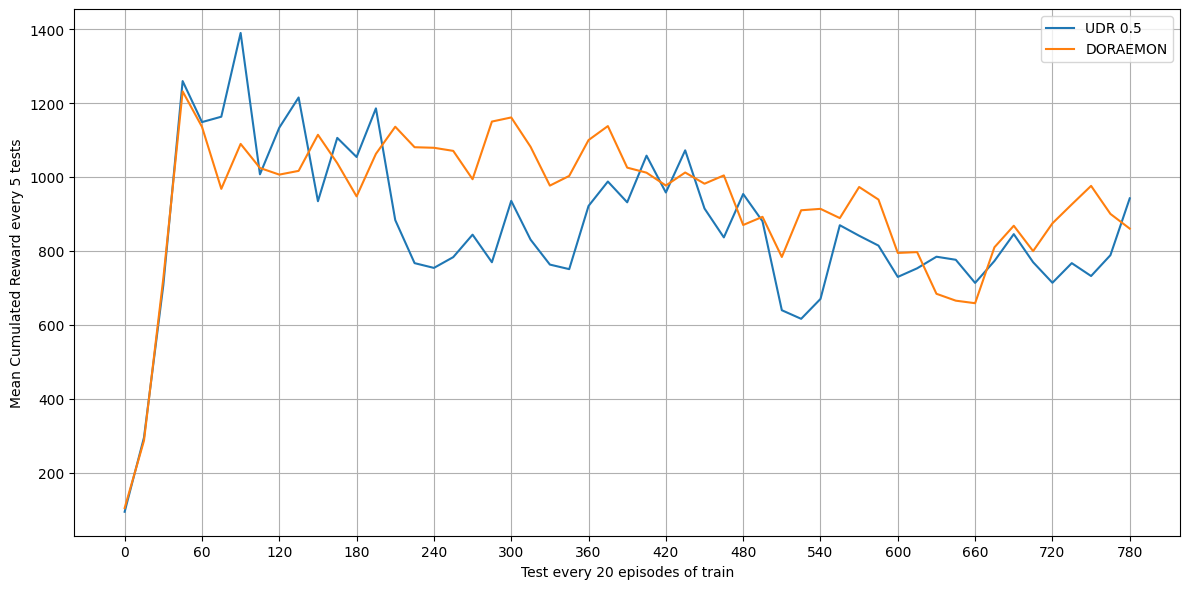

In [9]:
import matplotlib.pyplot as plt

labels = ['UDR 0.5', 'DORAEMON']
def plot_group_means_no_window(file_list):
    assert len(file_list) % len(labels) == 0, "Il numero di file deve essere un multiplo di 3"

    plt.figure(figsize=(12, 6))  # Un unico grafico per tutti i gruppi

    for i in range(0, len(file_list), 3):
        group = file_list[i:i+3]

        all_values = []

        for filename in group:
            with open(filename, 'r') as f:
                lines = f.readlines()
                # Salta la prima riga (presumibilmente intestazione)
                values = [float(line.strip()) for line in lines[1:]]
                all_values.append(values)

        # Taglia tutti alla lunghezza minima comune
        #min_len = min(len(v) for v in all_values)
        min_len = 800

        all_values = [v[:min_len] for v in all_values]

        # Calcola la media per episodio
        pointwise_mean = [
            sum(vals) / len(vals)
            for vals in zip(*all_values)
        ]

        # Raggruppa ogni 50 valori e calcola la media per blocco
        block_size = 15
        num_blocks = len(pointwise_mean) // block_size
        pointwise_mean_blocked = [
        sum(pointwise_mean[i*block_size:(i+1)*block_size]) / block_size
        for i in range(num_blocks)]

        # Plot
        plt.plot(pointwise_mean_blocked, markersize=3, label=labels[i//3])
    # Numero di blocchi plottati
    # Numero di blocchi plottati
    num_blocks = len(pointwise_mean_blocked)

    tick_interval = 4  # ogni 4 blocchi * 5 episodi = ogni 20 episodi

    xticks_positions = list(range(0, num_blocks, tick_interval))
    xticks_labels = [str(i * block_size) for i in xticks_positions]

    plt.xticks(xticks_positions, xticks_labels)

    plt.xlabel('Test every 20 episodes of train')
    plt.ylabel('Mean Cumulated Reward every 5 tests')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

file_list = [
    'trained-models/udr/seed-10/0.5/test_rewards_CustomHopper-target-v0.txt',
    'trained-models/udr/seed-20/0.5/test_rewards_CustomHopper-target-v0.txt',
    'trained-models/udr/seed-40/0.5/test_rewards_CustomHopper-target-v0.txt',
    
    "trained-models/doraemon/e0.05-a0.5-d0.5-s2.0/seed-10/test_rewards_CustomHopper-target-v0.txt",
    "trained-models/doraemon/e0.05-a0.5-d0.5-s2.0/seed-20/test_rewards_CustomHopper-target-v0.txt",
    "trained-models/doraemon/e0.05-a0.5-d0.5-s2.0/seed-40/test_rewards_CustomHopper-target-v0.txt",
]

plot_group_means_no_window(file_list)